In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### data cleaning

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/projects/NLP/Quora_Question_Pair/dataset/questions.csv")
print("Number of data points",df.shape[0])
print("Number of features",df.shape[1])
df.head()
df.drop_duplicates(subset=['question1','question2'],inplace=True)
df.shape[0]


Number of data points 404351
Number of features 6


404351

In [ ]:
df.info()   # 1-null value in qustion1 and 2 null value in question 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df = df.dropna()
df.drop(columns=['id'],inplace=True)
df.head()

<ipython-input-7-3fd9932d83d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id'],inplace=True)


,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


ratio of not similar question 0.6307487609682748
ratio of similar question 0.36925123903172513


<Axes: xlabel='is_duplicate'>

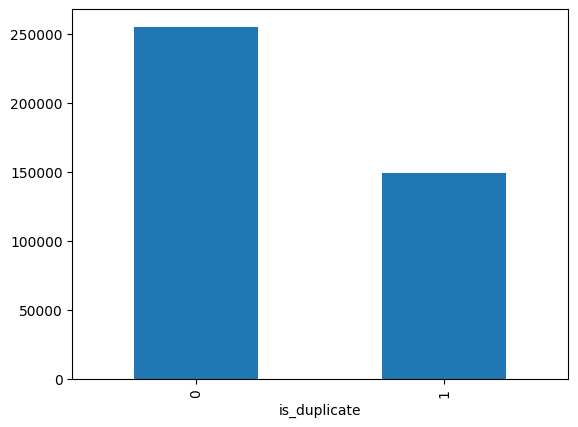

In [ ]:
notsimilar, similar =df.groupby('is_duplicate')['qid1'].count()
print("ratio of not similar question",notsimilar/df.shape[0])
print("ratio of similar question",similar/df.shape[0])
df.groupby('is_duplicate')['qid1'].count().plot.bar()

#Preprocessing

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

<ipython-input-16-3e5ee8a421a2>:157: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
<ipython-input-16-3e5ee8a421a2>:157: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


#Basic feature

In [ ]:

df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

df['common_words'] = df.apply(common_words, axis=1)

def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1) + len(w2)

df['total_words'] = df.apply(total_words, axis=1)

df['word_share'] = df.apply(lambda x: float(x['common_words']) / float(x['total_words']), axis=1)

df.head()

,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,total_words,word_share
0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,11,23,0.478261
1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,8,26,0.307692
2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,4,24,0.166667
3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,1,22,0.045455
4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,4,21,0.190476


##EAD

<ipython-input-24-3bfd6fc2cb1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['common_words'], label='Not Duplicate')
<ipython-input-24-3bfd6fc2cb1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['common_words'], label='Duplicate')


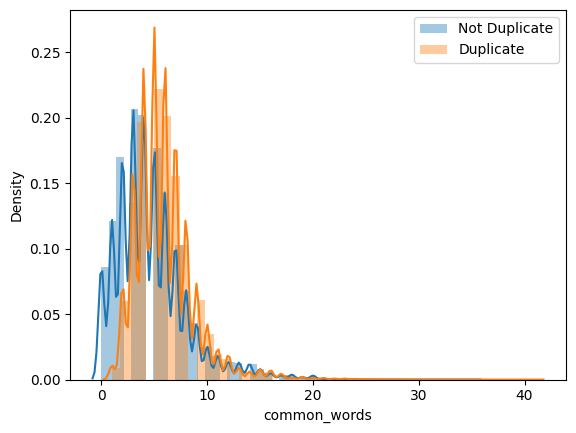

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['common_words'], label='Not Duplicate')
sns.distplot(df[df['is_duplicate']==1]['common_words'], label='Duplicate')
plt.legend()
plt.show()

<ipython-input-25-bec6adff15d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['total_words'], label='Not Duplicate')
<ipython-input-25-bec6adff15d0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['total_words'], label='Duplicate')


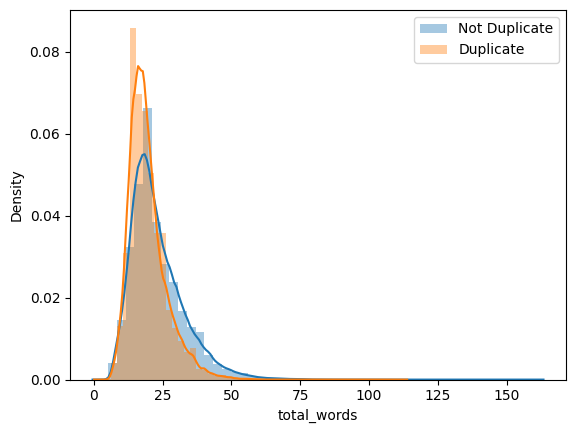

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['total_words'], label='Not Duplicate')
sns.distplot(df[df['is_duplicate']==1]['total_words'], label='Duplicate')
plt.legend()
plt.show()

<ipython-input-26-1fb5c8224127>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_share'], label='Not Duplicate')
<ipython-input-26-1fb5c8224127>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_share'], label='Duplicate')


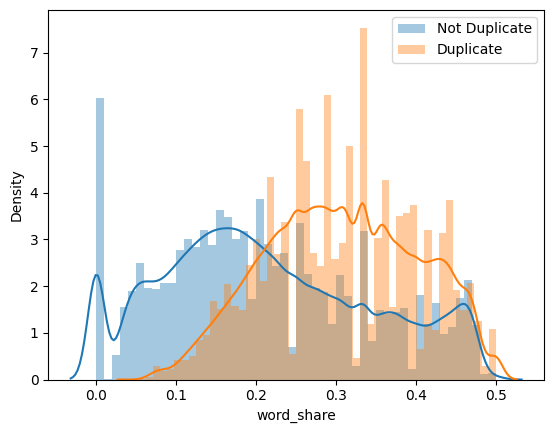

In [ ]:
sns.distplot(df[df['is_duplicate']==0]['word_share'], label='Not Duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'], label='Duplicate')
plt.legend()
plt.show()

#Advance Feature

##Token feature

In [ ]:
from nltk.corpus import stopwords

def token_feature_fetch(row):
  q1 = row['question1']
  q2 = row['question2']
  stop_words = stopwords.words("english")
  eplision = 0.001
  feature = [0.0]*8
  q1_token = q1.split()
  q2_token = q2.split()
  if len(q1_token)==0 or len(q2_token)==0:
    return feature
  q1_words = set([word for word in q1_token if word not in stop_words])
  q2_words = set([word for word in q2_token if word not in stop_words])

  q1_stop_words = set([word for word in q1_token if word in stop_words])
  q2_stop_words = set([word for word in q2_token if word in stop_words])

  common_word_count = len(q1_words.intersection(q2_words))
  common_stop_word_count = len(q1_stop_words.intersection(q2_stop_words))
  common_token_count = len(set(q1_token).intersection(set(q2_token)))

  feature[0] = common_word_count / (min(len(q1_words), len(q2_words)) + eplision)
  feature[1] = common_word_count / (max(len(q1_words), len(q2_words)) + eplision)
  feature[2] = common_stop_word_count / (min(len(q1_stop_words), len(q2_stop_words)) + eplision)
  feature[3] = common_stop_word_count / (max(len(q1_stop_words), len(q2_stop_words)) + eplision)
  feature[4] = common_token_count / (min(len(q1_token), len(q2_token)) + eplision)
  feature[5] = common_token_count / (max(len(q1_token), len(q2_token)) + eplision)

  feature[6] = int(q1_token[-1]==q2_token[-1])
  feature[7] = int(q1_token[0]==q2_token[0])

  return feature

In [ ]:
token_feature = df.apply(token_feature_fetch, axis=1)
df['cwc_min'] = list(map(lambda x: x[0], token_feature))
df['cwc_max'] = list(map(lambda x: x[1], token_feature))
df['csc_min'] = list(map(lambda x: x[2], token_feature))
df['csc_max'] = list(map(lambda x: x[3], token_feature))
df['ctc_min'] = list(map(lambda x: x[4], token_feature))
df['ctc_max'] = list(map(lambda x: x[5], token_feature))
df['last_word_eq'] = list(map(lambda x: x[6], token_feature))
df['first_word_eq'] = list(map(lambda x: x[7], token_feature))
df.head()

,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,11,23,0.478261,0.99980,0.833194,0.999833,0.999833,0.916590,0.785658,0.0,1.0
1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,8,26,0.307692,0.79984,0.399960,0.749813,0.599880,0.699930,0.466636,0.0,1.0
2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,4,24,0.166667,0.39992,0.333278,0.399920,0.249969,0.399960,0.285694,0.0,1.0
3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,1,22,0.045455,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,4,21,0.190476,0.39992,0.199980,0.999500,0.666445,0.571347,0.307669,0.0,1.0


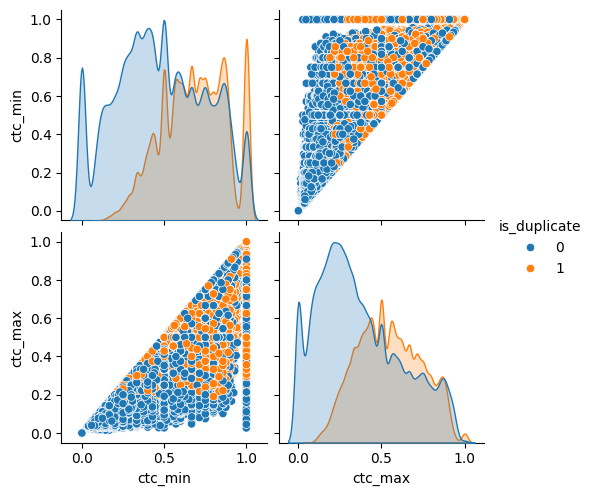

In [ ]:
sns.pairplot(df[['ctc_min', 'ctc_max','is_duplicate']], hue='is_duplicate')
plt.show()

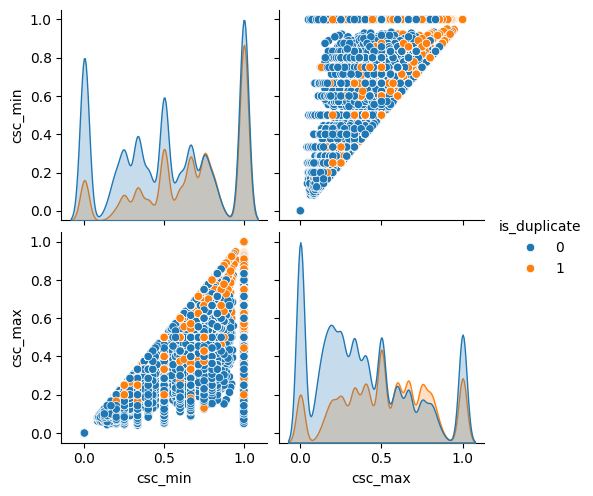

In [ ]:
sns.pairplot(df[['csc_min', 'csc_max','is_duplicate']], hue='is_duplicate')
plt.show()

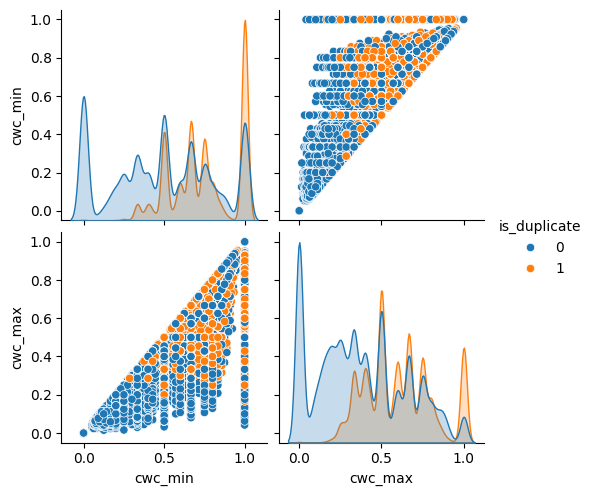

In [ ]:
sns.pairplot(df[['cwc_min', 'cwc_max','is_duplicate']], hue='is_duplicate')
plt.show()

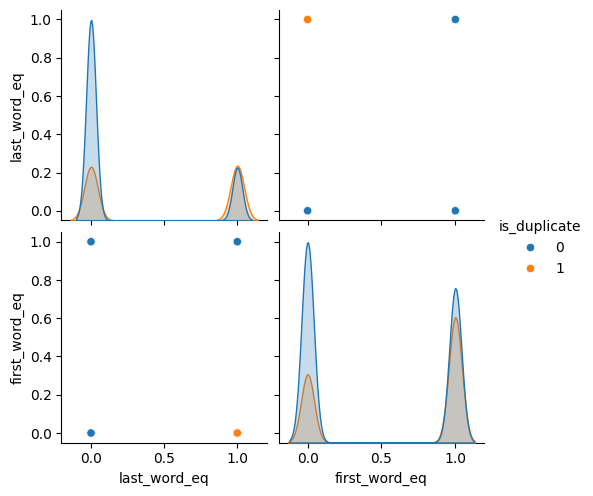

In [ ]:
sns.pairplot(df[['last_word_eq','first_word_eq','is_duplicate']], hue='is_duplicate')
plt.show()

##Distance feature

In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=107219e2df6bff2422179152c5ff37fb13f96125dbe8a612f7fea42dfe345934
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import distance

def length_feature_fetch(row):
  q1 = row['question1']
  q2 = row['question2']
  feature = [0.0]*3

  q1_token = q1.split()
  q2_token = q2.split()

  if len(q1_token)==0 or len(q2_token)==0:
    return feature

  feature[0] = abs(len(q1_token) - len(q2_token))
  feature[1] = (len(q1_token) + len(q2_token)) / 2

  strs = list(distance.lcsubstrings(q1, q2))
  if strs:
    feature[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

  return feature

In [ ]:
q1="How are you"
q2="I am fine"
strs = list(distance.lcsubstrings(q1, q2))
print(len(strs[0]) / (min(len(q1), len(q2)) + 1))

0.2


In [ ]:
length_feature = df.apply(length_feature_fetch, axis=1)
df['abs_len_dfiierence'] = list(map(lambda x: x[0], length_feature))
df['total_len_difference'] = list(map(lambda x: x[1], length_feature))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_feature))
df.head()


,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,total_words,word_share,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_dfiierence,total_len_difference,longest_substr_ratio
0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,11,23,0.478261,...,0.833194,0.999833,0.999833,0.916590,0.785658,0.0,1.0,2.0,13.0,0.982456
1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,8,26,0.307692,...,0.399960,0.749813,0.599880,0.699930,0.466636,0.0,1.0,5.0,12.5,0.588235
2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,4,24,0.166667,...,0.333278,0.399920,0.249969,0.399960,0.285694,0.0,1.0,4.0,12.0,0.169492
3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,1,22,0.045455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,11.5,0.040000
4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,4,21,0.190476,...,0.199980,0.999500,0.666445,0.571347,0.307669,0.0,1.0,6.0,10.0,0.153846


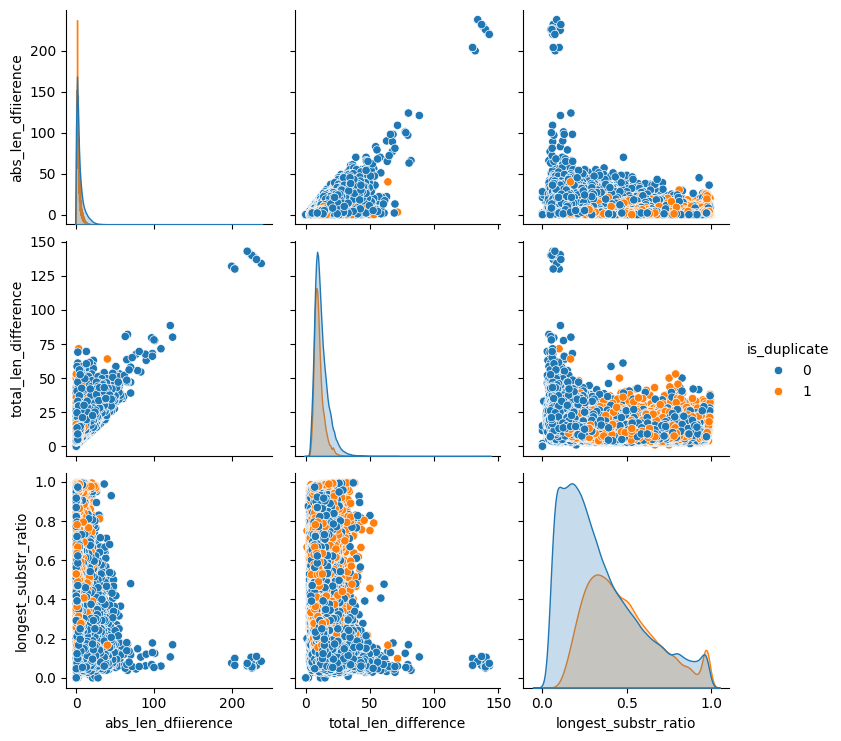

In [ ]:
sns.pairplot(df[['abs_len_dfiierence', 'total_len_difference','longest_substr_ratio','is_duplicate']], hue='is_duplicate')
plt.show()

##Fuzzy freature

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fuzzy_feature_fetch(row):
  q1 = str(row['question1'])
  q2 = str(row['question2'])
  feature = [0.0]*5

  feature[0] = fuzz.QRatio(q1, q2)
  feature[1] = fuzz.WRatio(q1, q2)
  feature[2] = fuzz.partial_ratio(q1, q2)
  feature[3] = fuzz.token_sort_ratio(q1, q2)
  feature[4] = fuzz.token_set_ratio(q1, q2)

  return feature

In [ ]:
df.head()
df.to_csv('after_preprocess_and_adding_features.csv')

In [ ]:
fuzzy_feature = df.apply(fuzzy_feature_fetch, axis=1)


In [ ]:
df['fuzz_Qratio'] = list(map(lambda x: x[0], fuzzy_feature))
df['fuzz_wRatio'] = list(map(lambda x: x[1], fuzzy_feature))
df['fuzz_partial_ratio'] = list(map(lambda x: x[2], fuzzy_feature))
df['fuzz_token_sort_ratio'] = list(map(lambda x: x[3], fuzzy_feature))
df['fuzz_token_set_ratio'] = list(map(lambda x: x[4], fuzzy_feature))
df.head()

,Unnamed: 0,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,total_words,...,last_word_eq,first_word_eq,abs_len_dfiierence,total_len_difference,longest_substr_ratio,fuzz_Qratio,fuzz_wRatio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,11,23,...,0.0,1.0,2.0,13.0,0.982456,93,95,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,8,26,...,0.0,1.0,5.0,12.5,0.588235,66,86,74,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,4,24,...,0.0,1.0,4.0,12.0,0.169492,43,60,46,63,63
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,1,22,...,0.0,0.0,1.0,11.5,0.040000,9,27,11,25,28
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,75,38,4,21,...,0.0,1.0,6.0,10.0,0.153846,35,86,55,47,67


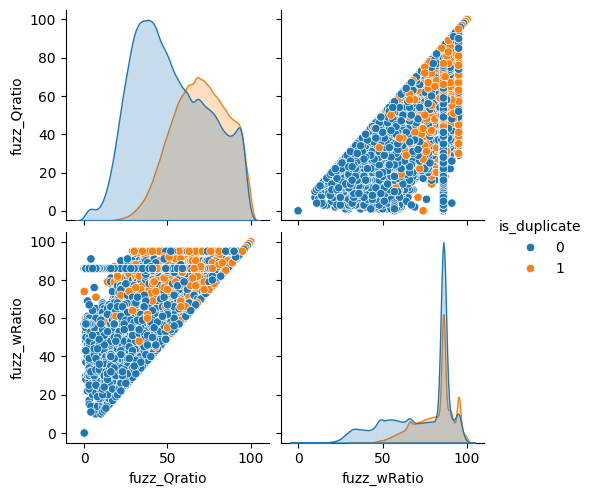

In [ ]:
sns.pairplot(df[['fuzz_Qratio', 'fuzz_wRatio','is_duplicate']], hue='is_duplicate')
plt.show()

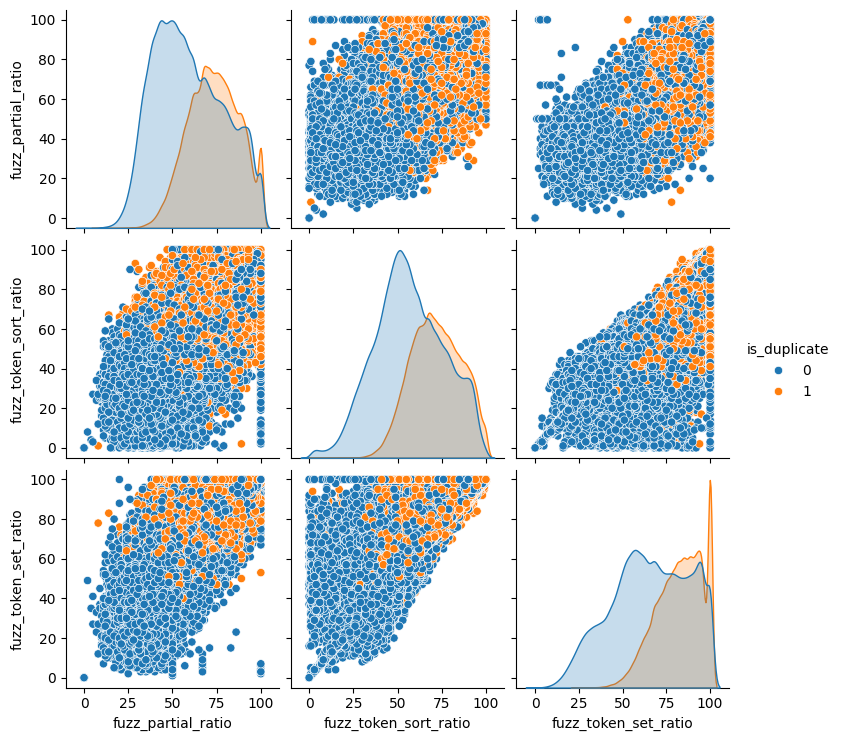

In [ ]:
sns.pairplot(df[['fuzz_partial_ratio', 'fuzz_token_sort_ratio','fuzz_token_set_ratio','is_duplicate']], hue='is_duplicate')
plt.show()

In [ ]:
df.to_csv('after_preprocess_and_adding_features.csv')

#Tf-idf

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/projects/NLP/Quora_Question_Pair/dataset/after_preprocess_and_adding_features.csv")

ratio of not similar question 0.6305
ratio of similar question 0.3695


<Axes: xlabel='is_duplicate'>

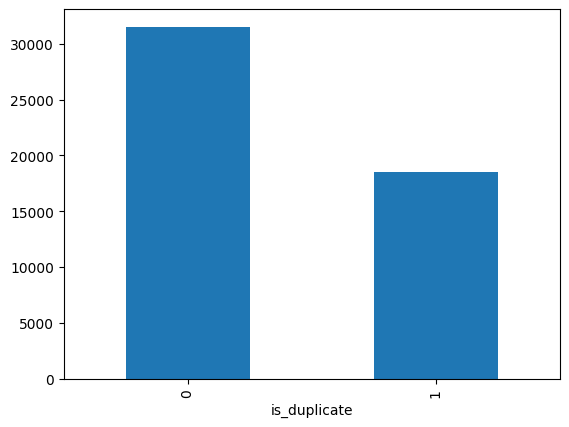

In [ ]:
new_df = df.sample(50000)
notsimilar, similar =new_df.groupby('is_duplicate')['qid1'].count()
print("ratio of not similar question",notsimilar/new_df.shape[0])
print("ratio of similar question",similar/new_df.shape[0])
new_df.groupby('is_duplicate')['qid1'].count().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer_q1 = TfidfVectorizer(max_features=3000)
vectorizer_q2 = TfidfVectorizer(max_features=3000)

# Fit and transform the text data for each column
tfidf_matrix_q1 = vectorizer_q1.fit_transform(new_df['question1'].fillna(''))
tfidf_matrix_q2 = vectorizer_q2.fit_transform(new_df['question2'].fillna(''))

# Convert the TF-IDF matrices to DataFrames for better readability
tfidf_df_q1 = pd.DataFrame(tfidf_matrix_q1.toarray(), columns=vectorizer_q1.get_feature_names_out())
tfidf_df_q2 = pd.DataFrame(tfidf_matrix_q2.toarray(), columns=vectorizer_q2.get_feature_names_out())


In [ ]:
# print(tfidf_df)
tfidf_df_q1

,000,10,100,10k,10th,11,12,12th,13,14,...,you,young,younger,your,yourself,youtube,zealand,zero,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df = new_df.drop(['question1', 'question2','qid1','qid2'], axis=1)
print(final_df.shape)

(50000, 24)


In [ ]:
final_df = pd.concat([final_df, tfidf_df_q1, tfidf_df_q1 ], axis=1)
final_df.head()

,Unnamed: 0.1,Unnamed: 0,is_duplicate,q1_len,q2_len,common_words,total_words,word_share,cwc_min,cwc_max,...,yoga,york,you,young,your,yourself,youtube,zero,zone,zuckerberg
184008,184008.0,184009.0,0.0,104.0,34.0,4.0,25.0,0.160000,0.749813,0.428510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156390,156390.0,156391.0,0.0,106.0,145.0,5.0,42.0,0.119048,0.333296,0.249979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339537,339537.0,339539.0,1.0,81.0,43.0,7.0,22.0,0.318182,0.799840,0.666556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130259,130259.0,130260.0,1.0,74.0,76.0,10.0,24.0,0.416667,0.999800,0.833194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60921,60921.0,60921.0,1.0,43.0,31.0,5.0,16.0,0.312500,0.999667,0.599880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv('after_tfidf.csv')

#Spliting the test, val, train

In [ ]:
final_df = pd.read_csv(r"/content/drive/MyDrive/projects/NLP/Quora_Question_Pair/dataset/after_tfidf.csv")

In [ ]:
final_df = final_df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','question1', 'question2','qid1','qid2'], axis=1)
final_df.head()

,is_duplicate,q1_len,q2_len,common_words,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,...,last_word_eq,first_word_eq,abs_len_dfiierence,total_len_difference,longest_substr_ratio,fuzz_Qratio,fuzz_wRatio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
0,0,65,56,11,23,0.478261,0.99980,0.833194,0.999833,0.999833,...,0.0,1.0,2.0,13.0,0.982456,93,95,100,93,100
1,0,50,87,8,26,0.307692,0.79984,0.399960,0.749813,0.599880,...,0.0,1.0,5.0,12.5,0.588235,66,86,74,63,86
2,0,72,58,4,24,0.166667,0.39992,0.333278,0.399920,0.249969,...,0.0,1.0,4.0,12.0,0.169492,43,60,46,63,63
3,0,49,58,1,22,0.045455,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,11.5,0.040000,9,27,11,25,28
4,0,75,38,4,21,0.190476,0.39992,0.199980,0.999500,0.666445,...,0.0,1.0,6.0,10.0,0.153846,35,86,55,47,67


In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop(['is_duplicate'], axis=1)
y = final_df['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test)

(323478, 21)
        q1_len  q2_len  common_words  total_words  word_share   cwc_min  \
371029      92      37             4           22    0.181818  0.333222   
263496      34      53             3           19    0.157895  0.749813   
111007      58      73             3           25    0.120000  0.333278   
75665       18      46             3           14    0.214286  0.999500   
52376       19      48             1           14    0.071429  0.333222   
...        ...     ...           ...          ...         ...       ...   
237260      34      32             4           15    0.266667  0.666445   
335199      63      71            10           24    0.416667  0.857020   
283103      45      48             4           15    0.266667  0.666445   
272516      77      44             0           20    0.000000  0.000000   
177495      52      60             9           24    0.375000  0.666556   

         cwc_max   csc_min   csc_max   ctc_min  ...  last_word_eq  \
371029  0.124984 

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1.0]

#Logisttic regression

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7036849264251267
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     51240
           1       0.61      0.54      0.57     29630

    accuracy                           0.70     80870
   macro avg       0.68      0.67      0.67     80870
weighted avg       0.70      0.70      0.70     80870



In [ ]:
import seaborn as sns

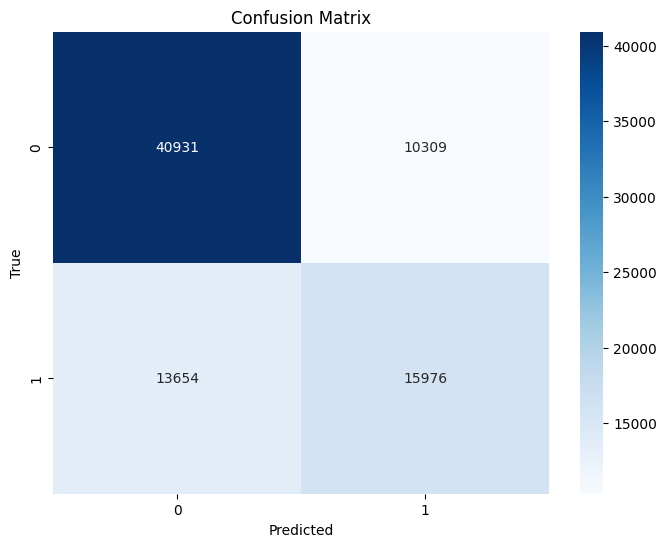

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
kernels = ['linear']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Kernel: {kernel}')
    plt.show()